In [1]:
# LOAD PACKAGES
install.packages('SentimentAnalysis')
library(SentimentAnalysis)
library(ggplot2)
library(dplyr)
install.packages('wru')
library(wru)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘iterators’, ‘NLP’, ‘slam’, ‘tau’, ‘foreach’, ‘lars’, ‘randomForest’, ‘tm’, ‘qdapDictionaries’, ‘ngramrr’, ‘moments’, ‘stringdist’, ‘XML’, ‘glmnet’, ‘spikeslab’


Attaching package: ‘SentimentAnalysis’

The following object is masked from ‘package:base’:

    write


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [2]:
# LOAD DATA
data <- read.csv("output/OpenSci3Discipline.csv", header = T, stringsAsFactors = F) 

## how many missing abstracts?
nrow(data) #2926
sum(data$IndexedAbstract == '') #1020
mean(data$IndexedAbstract == '') #35% missing
data %>% group_by(Tag) %>% summarize(count_no_abstract = sum(IndexedAbstract == ''), pct_no_abstract = mean(IndexedAbstract == ''))

[1] 2926

[1] 1020

[1] 0.3485988

Tag,count_no_abstract,pct_no_abstract
OpenScience,205,0.2332196
Reproducibility,815,0.3981436


In [3]:
# ANALYZE SENTIMENT
## use R package to analyze sentiment

as <- analyzeSentiment(data$IndexedAbstract[1:nrow(data)])
data <- cbind(data, as)

## View sentiment direction (i.e. positive, neutral and negative) with the two
## most popular directories QDAP and GI
data$DirectionQDAP <- convertToDirection(data$SentimentQDAP)
data$DirectionGI <- convertToDirection(data$SentimentGI)

# SAVE
write.csv(x = data, file = "abstracts_scored.csv")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1020 rows containing non-finite values (stat_bin).”

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1020 rows containing non-finite values (stat_bin).”

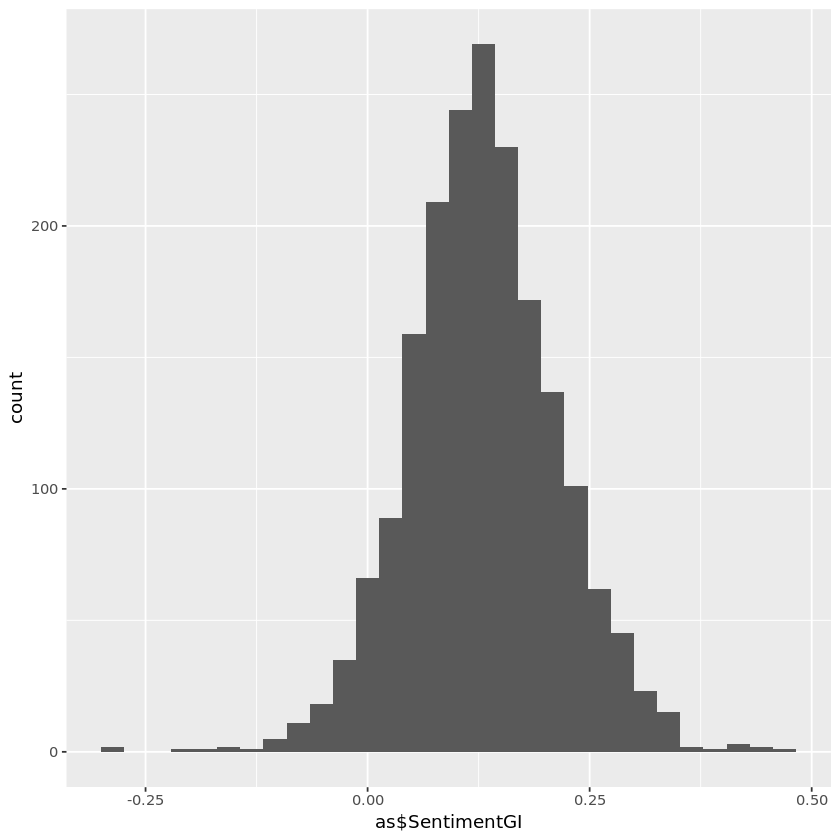

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1020 rows containing non-finite values (stat_bin).”

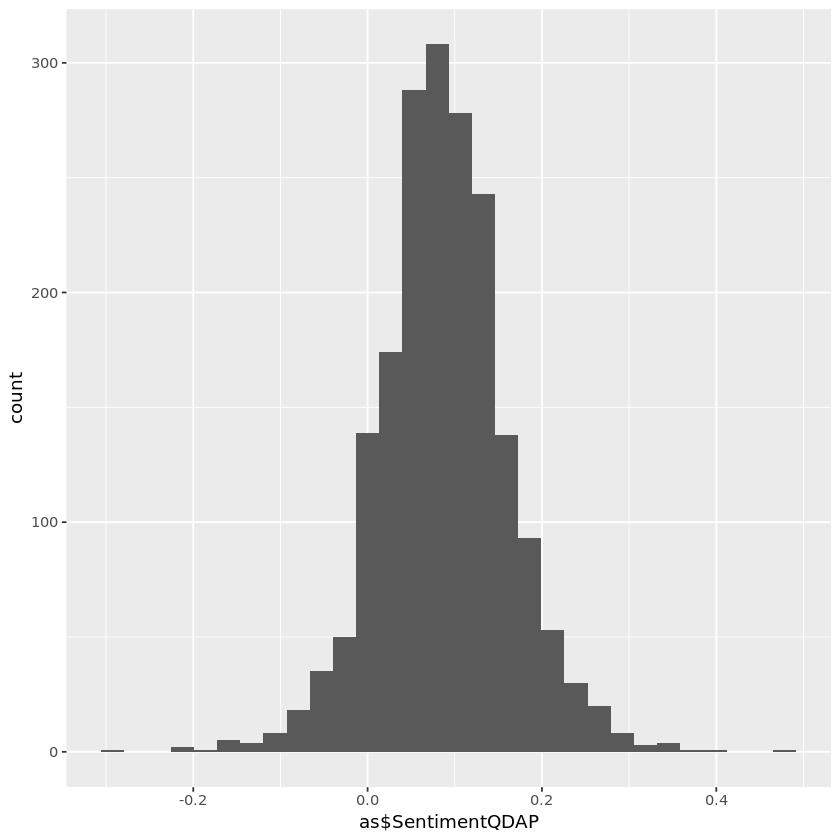

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1020 rows containing non-finite values (stat_bin).”

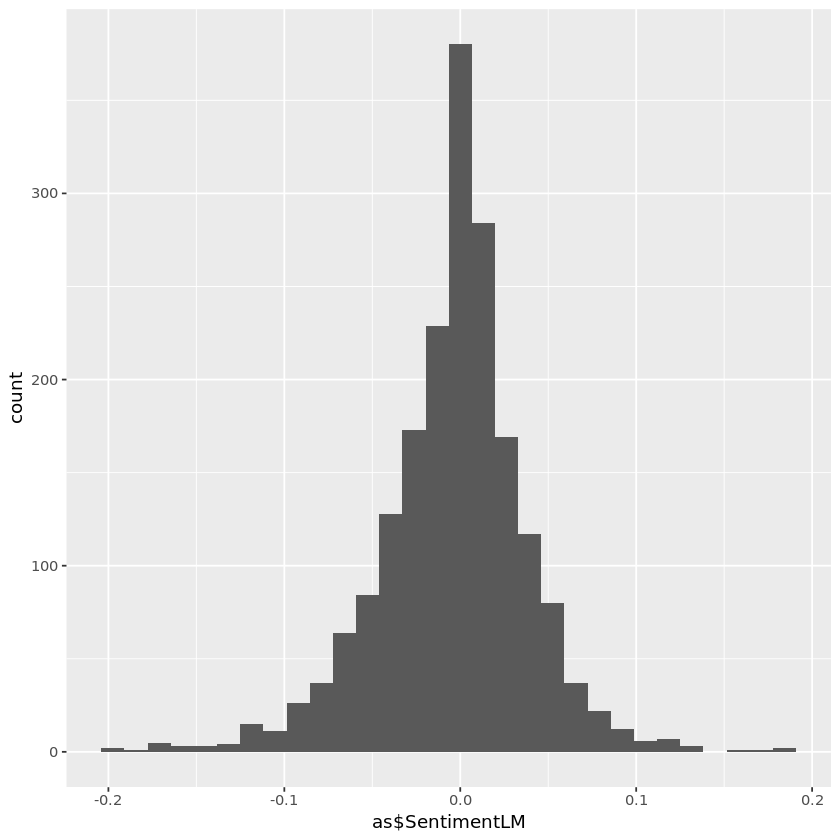

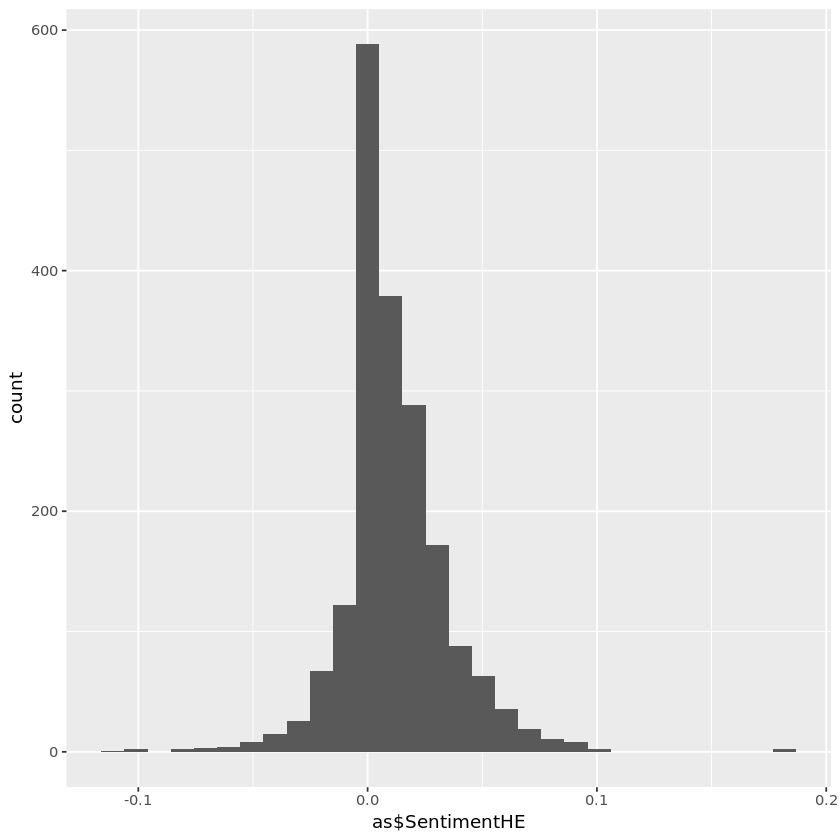

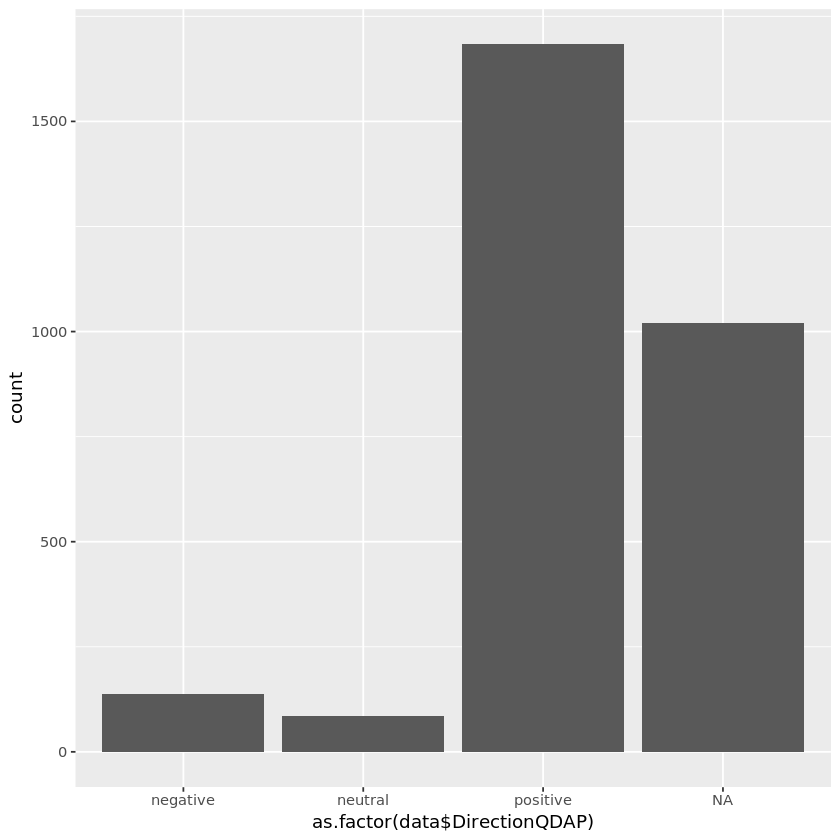

In [6]:
## ANALYSIS
### Histograms
qplot(x = as$SentimentGI, geom = "histogram")
qplot(x = as$SentimentQDAP, geom = "histogram")
qplot(x = as$SentimentLM, geom = "histogram")
qplot(x = as$SentimentHE, geom = "histogram")
qplot(x = as.factor(data$DirectionQDAP), geom = "bar")

### CUSTOM DICTIONARIES

In [7]:
## load the custom words file
custom <- read.csv("input/Lancet Dictionaries.csv", header = T, stringsAsFactors = F)
head(custom)

IndivConstruct,PotentialComposite,Words
Collaboration,Team Science,collab
Collaboration,Team Science,team
Collaboration,Team Science,together
Collaboration,Team Science,sharing
Collaboration,Team Science,share
Collaboration,Team Science,unit


In [4]:
# how many dictionaries:
constructs <- levels(as.factor(custom$IndivConstruct)) 
length(constructs) #15

# extract the right data (the word list)
data <- read.csv("input/OpenSci3Discipline.csv", header = T, stringsAsFactors = F) 
full_custom_results <- data.frame(PaperId = data$PaperId)
for (construct_i in constructs){
  X <- custom %>% 
    filter(IndivConstruct %in% construct_i)
  # create the dictionary with the word list
  wordlist_i <- SentimentDictionaryWordlist(X$Words)
  summary(wordlist_i)
  # score the data
  custom_results_i <- analyzeSentiment(data$IndexedAbstract,
                                         rules=list(x=list(ruleRatio, wordlist_i)))
  full_custom_results <- cbind(full_custom_results, custom_results_i)
}
# set the columns name
constructs2 <- gsub(pattern = " ", replacement = "", x=constructs) #remove spaces
constructs2 <- gsub(pattern = "/", replacement = "_", x=constructs2) #replace slashes
constructs2 <- gsub(pattern = "-", replacement = "", x=constructs2) #replace dashes
names(full_custom_results)[-1] <- constructs2

#bring in important vars
full_custom_results <- cbind(full_custom_results, data[,c('Tag','IndexedAbstract','Title')])

write.csv(x = full_custom_results, file="output/abstracts_scored_custom.csv", row.names = FALSE)

ERROR: Error in is.factor(x): object 'custom' not found
